Hometask for lec 6

In [1]:
#Importing packages
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

In [2]:
#Set interactive backend
%matplotlib inline

In [ ]:
# Load the Boston housing dataset(it is curently banned, so I use alternative dataset from from sklearn.datasets import fetch_openml, california housing  )
boston = fetch_openml(name='boston', version=1, as_frame=True)
df = boston.data
y = boston.target


In [ ]:
# Select only the 'RM' feature (average number of rooms per dwelling)
df = df[['RM']].copy()
df.loc[:, 'target'] = y

In [ ]:
#Checking dataset
print (df.head(10))
df.describe ()

      RM  target
0  6.575    24.0
1  6.421    21.6
2  7.185    34.7
3  6.998    33.4
4  7.147    36.2
5  6.430    28.7
6  6.012    22.9
7  6.172    27.1
8  5.631    16.5
9  6.004    18.9


,RM,target
count,506.000000,506.000000
mean,6.284634,22.532806
std,0.702617,9.197104
min,3.561000,5.000000
25%,5.885500,17.025000
50%,6.208500,21.200000
75%,6.623500,25.000000
max,8.780000,50.000000


<Axes: xlabel='RM', ylabel='target'>

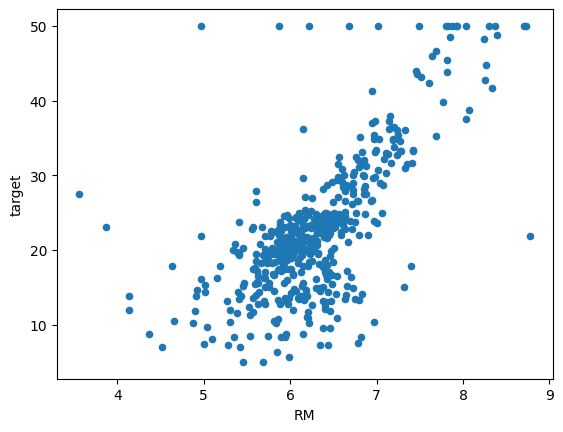

In [ ]:
# Plot a scatter plot between RM and target
df.plot.scatter('RM', 'target')

In [ ]:
# Load the dataset again and split into features (X) and target (y)
X_full, y = fetch_openml(name='boston', version=1, as_frame=True, return_X_y=True)

# Select the values of feature 'AveRooms' only and assign to X
X = X_full['RM'].values

# Reshape X to 2D
X = X.reshape(-1,1)

# Apply train_test_split to X and y to get X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# DON'T_CHANGE_THIS_CODE. It is used to let you check the result is correct 
print ('X_train.shape= ',X_train.shape)
print ('y_train.shape= ',y_train.shape)
X_train[:10]

X_train.shape=  (404, 1)
y_train.shape=  (404,)


array([[5.304],
       [5.834],
       [6.031],
       [6.103],
       [5.727],
       [6.431],
       [6.037],
       [6.383],
       [6.152],
       [6.852]])

In [ ]:
# Define a simple Linear Regression model class
class Linear_Regression_1():
    def __init__(self):
        pass
      
      
    def h(self, b, w, X):
        '''
        :param b -  float or ndarry of shape [m,1], m - number of samples
        :param w - ndarray of shape [1,n],  n - number of features
        :param X - ndarray of shape [m,n], m - number of samples, n - number of features
        '''
        assert (X.shape[1]== w.shape[1])
        h_res = b + np.dot(X, w.T)
        return h_res

In [ ]:
# Initialize and test the Linear_Regression_1 class
np.random.seed(2018)
b_check= np.random.randn()
w_check= np.random.randn(1,1)
X_check= np.random.randn(10,1)
print('b= {}, \nw= {}, \nX= \n{}'.format(b_check, w_check, X_check))
lin_reg_1 = Linear_Regression_1()
lin_reg_1.h(b_check, w_check, X_check)

b= -0.276767596147759, 
w= [[0.581851]], 
X= 
[[ 2.14839926]
 [-1.279487  ]
 [ 0.50227689]
 [ 0.8560293 ]
 [-0.14279008]
 [ 0.11007867]
 [-0.68806479]
 [ 0.43356408]
 [ 0.510221  ]
 [-0.16513097]]


array([[ 0.97328067],
       [-1.02123839],
       [ 0.01548272],
       [ 0.22131391],
       [-0.35985014],
       [-0.21271821],
       [-0.67711878],
       [-0.0244979 ],
       [ 0.02010501],
       [-0.37284922]])

In [ ]:
# Define a Linear Regression class with cost function
class Linear_Regression_2():
    '''
    linear regression using gradient descent
    '''
    def __init__(self):
        pass
    
    
    def J(self, h, y):
        '''
        :param h - ndarray of shape (m,1)
        :param y - ndarray of shape (m,1)
        :return expression for cost function 
        '''      
        if h.shape != y.shape:
            print('h.shape = {} does not match y.shape = {}'.format (h.shape, y.shape))
            raise Exception('Check assertion in J')    
        
        m = h.shape[0]
        err = h - y
        J_res = (1 / (2 * m)) * np.sum(err ** 2)
        return J_res

In [ ]:
# Test the cost function with random values
np.random.seed(2019)
m = 10 
y_check= np.random.randn(m,1)
h_check= np.random.randn(m,1)
print('y= {}, \nh= {}'.format(y_check, h_check))
lin_reg_2 = Linear_Regression_2()
lin_reg_2.m = m 
lin_reg_2.J(h_check, y_check)

y= [[-0.21767896]
 [ 0.82145535]
 [ 1.48127781]
 [ 1.33186404]
 [-0.36186537]
 [ 0.68560883]
 [ 0.57376143]
 [ 0.28772767]
 [-0.23563426]
 [ 0.95349024]], 
h= [[-1.6896253 ]
 [-0.34494271]
 [ 0.0169049 ]
 [-0.51498352]
 [ 0.24450929]
 [-0.18931261]
 [ 2.67217242]
 [ 0.46480249]
 [ 0.84593044]
 [-0.50354158]]


np.float64(0.897146515186598)

In [ ]:
# More advanced Linear Regression class with gradient computation
class Linear_Regression_3():
    def __init__(self, max_iter=1e5, alpha=1, eps=1e-10, verbose=0):
        pass        
    
    
    def h(self, b, w, X):
        '''
        :param b -  float or ndarry of shape [m,1], m - number of samples
        :param w - ndarray of shape [1,m],  n - number of features
        :param X - ndarray of shape [m,n], m - number of samples, n - number of features
        '''
        assert (X.shape[1] == w.shape[1])
        h_res = b + np.dot(X, w.T)
        
        return h_res
    
        
    def J_derivative(self, params, X, y):
        '''
        :param params - tuple (b,w), where w is the 2d ndarry of shape (1,n), n- number of features 
        :param X- ndarray of shape (m, n)
        :param y - ndarray of shape (m,1)
        :return tuple of derivatrives of cost function by b and w
        '''
        b, w = params
        assert (w.shape == (1, self.n))                
        h_val = self.h(b, w, X)
        
        if h_val.shape != (self.m, 1):
            print('h.shape = {}, but expected {}'.format(h_val.shape, (self.m, 1)))
            raise Exception('Check assertion in J_derivative')
        
        m = X.shape[0]
        dJ_b = np.sum(h_val - y) / m
        dJ_w = np.dot((h_val - y).T, X) / m
        
        return (dJ_b, dJ_w)

In [ ]:
# Initialize and test Linear_Regression_3
np.random.seed(2020)
m = 10 
n = 1
X_check= np.random.randn(m,n)
y_check= np.random.randn(m,1)
b_check= np.random.randn()
w_check= np.random.randn(1,n)
params = b_check,w_check 
print('X= {}, \ny= {}, \nb= {} \nw= {}'.format(X_check, y_check, b_check, w_check))

lin_reg_3 = Linear_Regression_3()
lin_reg_3.m = m 
lin_reg_3.n = n 
lin_reg_3.J_derivative(params, X_check, y_check)

X= [[-1.76884571]
 [ 0.07555227]
 [-1.1306297 ]
 [-0.65143017]
 [-0.89311563]
 [-1.27410098]
 [-0.06115443]
 [ 0.06451384]
 [ 0.41011295]
 [-0.57288249]], 
y= [[-0.80133362]
 [ 1.31203519]
 [ 1.27469887]
 [-1.2143576 ]
 [ 0.31371941]
 [-1.44482142]
 [-0.3689613 ]
 [-0.76922658]
 [ 0.3926161 ]
 [ 0.05729383]], 
b= 2.0899788404287745 
w= [[0.04197131]]


(np.float64(2.190460881995871), array([[-1.43284262]]))

In [ ]:
#Developing gradient descent
class Linear_Regression_4():
    '''
    linear regression using gradient descent
    '''
    def __init__(self, max_iter=1e5, alpha=0.01, eps=1e-10, verbose=0):
        '''
        :param verbose: set 1 to display more details of J val changes
        '''
        self.max_iter = int(max_iter)
        self.alpha = alpha
        self.eps = eps
        self.verbose = verbose       
        
    def h(self, b, w, X):
        '''
        :param b -  float or ndarry of shape [m,1], m - number of samples
        :param w - ndarray of shape [1,n],  n - number of features
        :param X - ndarray of shape [m,n], m - number of samples, n - number of features
        ''' 
        assert (X.shape[1] == w.shape[1])
        h_res = X @ w.T + b
        if h_res.shape != (X.shape[0], 1):
            print('h.shape = {} but expected {}'.format(h_res.shape, (self.m, 1)))
            raise Exception('Check assertion in h')    
        return h_res

    def J(self, h, y):
        '''
        :param h - ndarray of shape (m,1)
        :param y - ndarray of shape (m,1)
        :return expression for cost function 
        '''     
        if h.shape != y.shape:
            print('h.shape = {} does not match y.shape = {}.Expected {}'.format(h.shape, y.shape, (self.m, 1)))
            raise Exception('Check assertion in J')   
        J_res = (1 / (2 * self.m)) * np.sum((h - y) ** 2)
        return J_res
        
    def J_derivative(self, params, X, y): 
        '''
        :param params - tuple (b,w), where w is the 2d ndarry of shape (1,n), n- number of features 
        :param X- ndarray of shape (m, n)
        :param y - ndarray of shape (m,1)
        :return tuple of derivatrives of cost function by b and w
        '''
        b, w = params
        assert (w.shape == (1, self.n))                
        h_val = self.h(b, w, X)
        if h_val.shape != (self.m, 1):
            print('h.shape = {}, but expected {}'.format(h_val.shape, (self.m, 1)))
            raise Exception('Check assertion in J_derivative')

        dJ_b = (1 / self.m) * np.sum(h_val - y)

        dJ_w = (1 / self.m) * ((h_val - y).T @ X)
        return (dJ_b, dJ_w)

    def fit(self, X, y):
        '''
        :param X - ndarray training set of shape [m,n], m - number of samples, n - number of features
        :param y - ndarray - 1d array 
        :return: True in case of successful fit 
        '''
        if self.verbose: 
            print('Running gradient descent with alpha = {}, eps= {}, max_iter= {}'.format(
                self.alpha, self.eps, self.max_iter))
        self.m, self.n= X.shape # number of samples, number of features  
        y = np.array(y).reshape(self.m, 1) # make it 2 d to make sure it corresponds to h_val
        b = 0 # init intercept with 0
        w= np.zeros(self.n).reshape(1,-1) # make sure it's shape is [1,n]
        params = (b,w)
        
        self.J_hist=[-1] # used for keeping J values. Init with -1 to avoid 0 at first iter
        continue_iter = True # flag to continue next iter (grad desc step)
        iter_number =0 # used for limit by max_iter

        while continue_iter:
            # Do step of gradient descent 
            dJ_b, dJ_w = self.J_derivative(params, X, y)
            b = b - self.alpha * dJ_b
            w = w - self.alpha * dJ_w
            params = (b, w)

            # keep history of J values
            self.J_hist.append(self.J(self.h(b, w, X), y))
            if self.verbose:
                print('b = {}, w= {}, J= {}'.format(b, w, self.J_hist[-1]))
            if self.max_iter and iter_number >= self.max_iter:
                continue_iter = False
            elif np.abs(self.J_hist[iter_number] - self.J_hist[iter_number + 1]) < self.eps:
                continue_iter = False
            iter_number += 1
        
        # store the final params to further using     
        self.intercept_, self.coef_ = params        
        return True

In [ ]:
#Checking gradient descent
np.random.seed(2021)
m = 10 
n = 1
X_check= np.random.randn(m,n)
y_check= np.random.randn(m,1)
print('X= {}, \ny= {}'.format(X_check, y_check))
lin_reg_4 = Linear_Regression_4(alpha = 1, max_iter = 5, verbose=1)
lin_reg_4.fit(X_check, y_check)

X= [[ 1.48860905]
 [ 0.67601087]
 [-0.41845137]
 [-0.80652081]
 [ 0.55587583]
 [-0.70550429]
 [ 1.13085826]
 [ 0.64500184]
 [ 0.10641374]
 [ 0.42215483]], 
y= [[ 0.12420684]
 [-0.83795346]
 [ 0.4090157 ]
 [ 0.10275122]
 [-1.90772239]
 [ 1.1002243 ]
 [-1.40232506]
 [-0.22508127]
 [-1.33620597]
 [ 0.30372151]]
Running gradient descent with alpha = 1, eps= 1e-10, max_iter= 5
b = -0.36693685587288444, w= [[-0.4217246]], J= 0.33976525493056825
b = -0.23643637277401236, w= [[-0.46886908]], J= 0.3278115023016167
b = -0.22184776004990137, w= [[-0.52721539]], J= 0.3250909705515032
b = -0.20379279582278398, w= [[-0.55396166]], J= 0.32428457786538833
b = -0.19551630227029396, w= [[-0.5697399]], J= 0.32403801171263197
b = -0.19063380881762437, w= [[-0.57831305]], J= 0.3239623872203208


True

In [ ]:
#the final step of linear regression
from sklearn.metrics import r2_score
class Linear_Regression():
    '''
    linear regression using gradient descent
    '''
    def __init__(self, max_iter=1e5, alpha=0.01, eps=1e-10, verbose=0):
        '''
        :param verbose: set 1 to display more details of J val changes
        '''
        self.max_iter = int(max_iter)
        self.alpha = alpha
        self.eps = eps
        self.verbose = verbose       
        
    def h(self, b, w, X):
        '''
        :param b -  float or ndarry of shape [m,1], m - number of samples
        :param w - ndarray of shape [1,n],  n - number of features
        :param X - ndarray of shape [m,n], m - number of samples, n - number of features
        ''' 
        assert (X.shape[1] == w.shape[1])
        h_res = X @ w.T + b
        if h_res.shape != (X.shape[0], 1):
            print('h.shape = {} but expected {}'.format(h_res.shape, (self.m, 1)))
            raise Exception('Check assertion in h')    
        return h_res

    def J(self, h, y):
        '''
        :param h - ndarray of shape (m,1)
        :param y - ndarray of shape (m,1)
        :return expression for cost function 
        '''     
        if h.shape != y.shape:
            print('h.shape = {} does not match y.shape = {}.Expected {}'.format(h.shape, y.shape, (self.m, 1)))
            raise Exception('Check assertion in J')   
        J_res = (1 / (2 * self.m)) * np.sum((h - y) ** 2)
        return J_res
        
    def J_derivative(self, params, X, y): 
        '''
        :param params - tuple (b,w), where w is the 2d ndarry of shape (1,n), n- number of features 
        :param X- ndarray of shape (m, n)
        :param y - ndarray of shape (m,1)
        :return tuple of derivatrives of cost function by b and w
        '''
        b, w = params
        assert (w.shape == (1, self.n))                
        h_val = self.h(b, w, X)
        if h_val.shape != (self.m, 1):
            print('h.shape = {}, but expected {}'.format(h_val.shape, (self.m, 1)))
            raise Exception('Check assertion in J_derivative')

        dJ_b = (1 / self.m) * np.sum(h_val - y)

        dJ_w = (1 / self.m) * ((h_val - y).T @ X)
        return (dJ_b, dJ_w)

    def fit(self, X, y):
        '''
        :param X - ndarray training set of shape [m,n], m - number of samples, n - number of features
        :param y - ndarray - 1d array 
        :return: True in case of successful fit 
        '''
        if self.verbose: 
            print('Running gradient descent with alpha = {}, eps= {}, max_iter= {}'.format(
                self.alpha, self.eps, self.max_iter))
        self.m, self.n= X.shape # number of samples, number of features  
        y = np.array(y).reshape(self.m, 1) # reshaping it to 2d
        b = 0 # init intercept with 0
        w= np.zeros(self.n).reshape(1,-1) # make sure it's shape is [1,n]
        params = (b,w)
        
        self.J_hist=[-1] # used for keeping J values. Init with -1 to avoid 0 at first iter
        continue_iter = True # flag to continue next iter (grad desc step)
        iter_number =0 # used for limit by max_iter

        while continue_iter:
            # Do step of gradient descent 
            dJ_b, dJ_w = self.J_derivative(params, X, y)
            b = b - self.alpha * dJ_b
            w = w - self.alpha * dJ_w
            params = (b, w)

            # keep history of J values
            self.J_hist.append(self.J(self.h(b, w, X), y))
            if self.verbose:
                print('b = {}, w= {}, J= {}'.format(b, w, self.J_hist[-1]))
            if self.max_iter and iter_number >= self.max_iter:
                continue_iter = False
            elif np.abs(self.J_hist[iter_number] - self.J_hist[iter_number + 1]) < self.eps:
                continue_iter = False
            iter_number += 1
        
        # store the final params to further using     
        self.intercept_, self.coef_ = params        
        return True
        
        
    def draw_cost_changes(self):        
        J_hist= self.J_hist[1:]
        plt.figure()
        plt.scatter(np.arange(0,len(J_hist)),J_hist,s=20,marker='.',c='b')
        plt.xlabel('Iterations')
        plt.ylabel('Cost function J value')
        title_str = 'Complited: {}, alpha ={}, max_iter={}, eps={}'.format( len(self.J_hist)-2, self.alpha, self.max_iter,self.eps)
        # Note: len(J_hist)-2) due to first one is -1 (was not iteration), iter + 1  at the end  of the gradient loop
        plt.title(title_str)
 

    def predict(self, X): 
        '''
        :param X - ndarray of shape (?,n)
        :return 
        '''
        return self.h(self.intercept_, self.coef_, X)
        
   
    def score(self, X_test, y_test):
        '''
        :param X_test - ndarray testing set or any for prediction of shape [?,n], ? - number of samples, n - number of features
        :param y_test - ndarray - 1d array 
        :return R2 score of y_test and prediction for X_test
        '''
        z= self.predict(X_test)

        return (r2_score(y_test, z))

X_train.shape=  (404, 1)
y_train.shape=  (404,)
X_train= 
[[5.304]
 [5.834]
 [6.031]
 [6.103]
 [5.727]]


R2 Score = 0.3709701523776461
b: -36.16490413510858, w= [[9.33556735]]


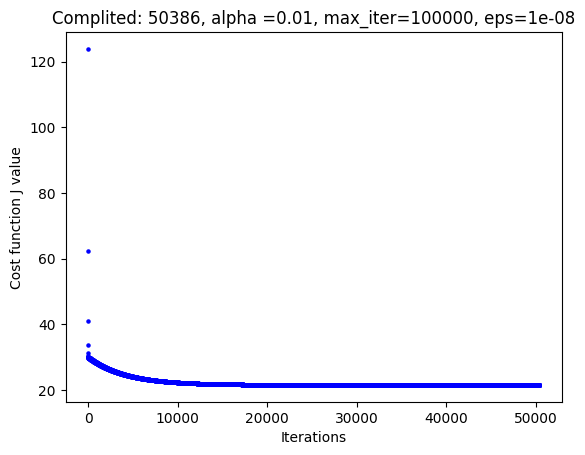

In [ ]:
#Checking results
print ('X_train.shape= ',X_train.shape)
print ('y_train.shape= ',y_train.shape)
print ('X_train= \n{}'.format (X_train[:5,:]))
lin_reg = Linear_Regression(alpha= 0.01, verbose=0, eps=1e-8)
lin_reg.fit (X_train, y_train)
lin_reg.draw_cost_changes()
print ('R2 Score =', lin_reg.score(X_test, y_test))
print ('b: {}, w= {}'.format(lin_reg.intercept_, lin_reg.coef_)) 

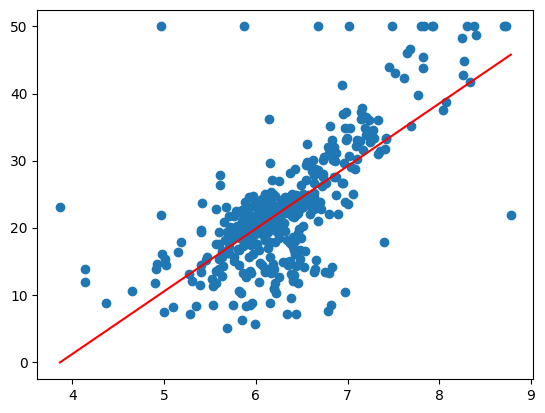

In [ ]:
#prediction of one feature
if X_train.shape[1]>1:
    raise Exception ('Select single feature to plot')
plt.figure()
plt.scatter(X_train, y_train)
x_line= np.array([np.min(X_train), np.max(X_train)])
z_line = lin_reg.predict(x_line.reshape(-1,1))
plt.plot(x_line, z_line, '-', c='red')

R2 Score = 0.37075967913579067
b: 22.795589278255086, w= [[6.62368094]]


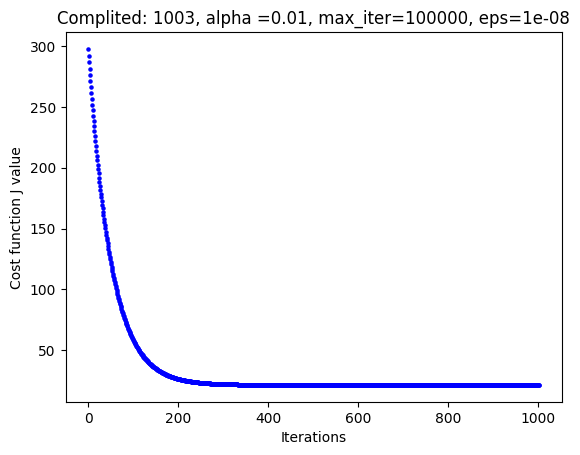

In [ ]:
#Using normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

lin_reg = Linear_Regression(alpha= 0.01, verbose=0, eps=1e-8)
lin_reg.fit (X_train_scaled, y_train)
print ('R2 Score =',lin_reg.score(X_test_scaled, y_test))
lin_reg.draw_cost_changes()
print ('b: {}, w= {}'.format(lin_reg.intercept_, lin_reg.coef_))

In [21]:
np.random.seed(2021)
X, y = fetch_openml(name='boston', version=1, return_X_y=True, as_frame=True)

# X = X[['RM']].values
# y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2018)

print('X_train.shape= ', X_train.shape)
print('y_train.shape= ', y_train.shape)
print('X_train[:5]=\n', X_train[:5])
X_train[:5]

X_train.shape=  (379, 13)
y_train.shape=  (379,)
X_train[:5]=
          CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
11    0.11747  12.5   7.87    0  0.524  6.009  82.9  6.2267   5  311.0   
422  12.04820   0.0  18.10    0  0.614  5.648  87.6  1.9512  24  666.0   
69    0.12816  12.5   6.07    0  0.409  5.885  33.0  6.4980   4  345.0   
267   0.57834  20.0   3.97    0  0.575  8.297  67.0  2.4216   5  264.0   
395   8.71675   0.0  18.10    0  0.693  6.471  98.8  1.7257  24  666.0   

     PTRATIO       B  LSTAT  
11      15.2  396.90  13.27  
422     20.2  291.55  14.10  
69      18.9  396.90   8.79  
267     13.0  384.54   7.44  
395     20.2  391.98  17.12  


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
11,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311.0,15.2,396.90,13.27
422,12.04820,0.0,18.10,0,0.614,5.648,87.6,1.9512,24,666.0,20.2,291.55,14.10
69,0.12816,12.5,6.07,0,0.409,5.885,33.0,6.4980,4,345.0,18.9,396.90,8.79
267,0.57834,20.0,3.97,0,0.575,8.297,67.0,2.4216,5,264.0,13.0,384.54,7.44
395,8.71675,0.0,18.10,0,0.693,6.471,98.8,1.7257,24,666.0,20.2,391.98,17.12


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

R2 training Score = 0.7283109539351162
R2 Score = 0.7714388325502527
b: 22.199472295514497, w= [[-6.71830658e-01  1.10017345e+00  3.90001036e-03  8.26310696e-01
  -2.22621836e+00  2.43476641e+00  2.54103095e-01 -3.29476208e+00
   2.45067848e+00 -1.99239213e+00 -1.95016226e+00  7.67364225e-01
  -4.20579594e+00]]


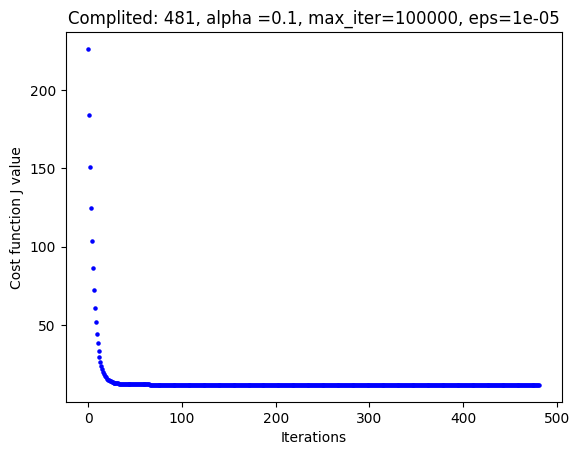

In [23]:
lin_reg = Linear_Regression(alpha= 0.1, verbose=0, eps=1e-5, max_iter=100000)
lin_reg.fit (X_train_scaled, y_train)
lin_reg.draw_cost_changes()
print ('R2 training Score =', lin_reg.score(X_train_scaled, y_train))
print ('R2 Score =', lin_reg.score(X_test_scaled, y_test))
print ('b: {}, w= {}'.format(lin_reg.intercept_, lin_reg.coef_)) 

In [ ]:
#compare with sklearn
from sklearn.linear_model import LinearRegression
lin_reg_sklearn = LinearRegression().fit(X_train_scaled, y_train)
lin_reg_sklearn.score(X_test_scaled, y_test)

0.7716066981275935